In [1]:
import numpy as np
import xarray as xr

import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadir = 'data/'
north = '300S'
dset = '_southof%s_swmt_'%north
lstr = 'sigma2'
dl = '005'

dset2 = '_moc_rho2_online_lores'

ddict = {mod:{} for mod in ['CM4','ESM4']}
ddict['CM4']['swmt'] = xr.open_dataset(datadir+'CM4_control_so_0251to0395'+dset+'%s_%s.nc'%(lstr,dl)).swmt
ddict['ESM4']['swmt'] = xr.open_dataset(datadir+'ESM4_control_so_0101to0270'+dset+'%s_%s.nc'%(lstr,dl)).swmt
ddict['CM4']['psi'] = xr.open_dataset(datadir+'CM4_control_global_0251to0405'+dset2+'.nc').psi
ddict['ESM4']['psi'] = xr.open_dataset(datadir+'ESM4_control_global_0101to0270'+dset2+'.nc').psi

In [3]:
dset3 = '_dVdt_rho2_online_lores'
ddict['CM4']['dVdt'] = xr.open_dataset(datadir+'CM4_control_so_0251to0405'+dset3+'.nc')['Storage change']
ddict['ESM4']['dVdt'] = xr.open_dataset(datadir+'ESM4_control_so_0101to0300'+dset3+'.nc')['Storage change']

In [4]:
ddict_basin = {b:{} for b in ['Atlantic','Pacific','Indian']}
ddict_basin['Atlantic']['water_mass'] = ['TW','SAMW','AAIW','NADW','AABW']
ddict_basin['Pacific']['water_mass'] = ['TW','SAMW','AAIW','CDW','AABW']
ddict_basin['Indian']['water_mass'] = ['TW','SAMW','AAIW','CDW','AABW']

ddict_wm = {var:{} for var in ['CM4','ESM4']}
for mod in ddict_wm:
    ddict_wm[mod] = {b:{} for b in list(ddict_basin.keys())}
    for name in ddict_wm[mod]:
        ddict_wm[mod][name]['water_mass'] = ddict_basin[name]['water_mass']
        
ddict_wm['CM4']['Atlantic']['sig2'] = [35.3,35.9,36.55,37.08]
ddict_wm['CM4']['Pacific']['sig2'] = [35.8, 36.2, 36.6, 37.05]
ddict_wm['CM4']['Indian']['sig2'] = [35.7, 36.2, 36.6, 37.065]

ddict_wm['ESM4']['Atlantic']['sig2'] = [35.2,35.4,36.55,37.08]
ddict_wm['ESM4']['Pacific']['sig2'] = [35.3, 35.65, 36.45, 37.01]
ddict_wm['ESM4']['Indian']['sig2'] = [35.2, 35.7, 36.6, 37.01]

In [5]:
for mod in ddict_wm:
    ddict[mod]['water_mass'] = ['TW','SAMW','AAIW','CDW','AABW']
    for i in range(0,4):
        #print(i,mod)
        tot=0
        for name in ddict_wm[mod]:
            #print(ddict_wm[mod][name]['water_mass'][i])
            #print(ddict_wm[mod][name]['sig2'][i])
            tot += ddict_wm[mod][name]['sig2'][i]
        print(mod,ddict[mod]['water_mass'][i],np.round(tot/3,2))

CM4 TW 35.6
CM4 SAMW 36.1
CM4 AAIW 36.58
CM4 CDW 37.06
ESM4 TW 35.23
ESM4 SAMW 35.58
ESM4 AAIW 36.53
ESM4 CDW 37.03


In [6]:
print('SAMW (CM4):',np.round((35.3+35.8+35.7)/3,1),'to',np.round((35.9+36.2+36.2)/3,1))
print('SAMW (ESM4):',np.round((35.2+35.3+35.2)/3,1),'to',np.round((35.4+35.65+35.7)/3,1))

print('AAIW (CM4):',np.round((35.9+36.2+36.2)/3,1),'to',np.round((36.55+36.6+36.6)/3,1))
print('AAIW (ESM4):',np.round((35.4+35.65+35.7)/3,1),'to',np.round((36.55+36.45+36.6)/3,1))

print('CDW (CM4):',np.round((36.55+36.6+36.6)/3,1),'to',np.round((37.08+37.05+37.065)/3,2))
print('CDW (ESM4):',np.round((36.55+36.45+36.6)/3,1),'to',np.round((37.08+37.01+37.01)/3,2))

SAMW (CM4): 35.6 to 36.1
SAMW (ESM4): 35.2 to 35.6
AAIW (CM4): 36.1 to 36.6
AAIW (ESM4): 35.6 to 36.5
CDW (CM4): 36.6 to 37.06
CDW (ESM4): 36.5 to 37.03


In [7]:
ddict['CM4']['water_mass'] = ['Upper Ocean','SAMW','AAIW','CDW','AABW']
ddict['CM4']['sig2'] = [35.6, 36.1, 36.6, 37.06]
ddict['ESM4']['water_mass'] = ['Upper Ocean','SAMW','AAIW','CDW','AABW']
ddict['ESM4']['sig2'] = [35.2, 35.6, 36.5, 37.03]

### Load WMT decomposed

In [8]:
dset_dcmp = '_southof%s_swmt_decomposed_'%north

ddict_dcmp = {mod:{} for mod in ['CM4','ESM4']}
ddict_dcmp['CM4'] = xr.open_dataset(datadir+'CM4_control_so_0251to0395'+dset_dcmp+'%s_%s.nc'%(lstr,dl))
ddict_dcmp['ESM4'] = xr.open_dataset(datadir+'ESM4_control_so_0101to0270'+dset_dcmp+'%s_%s.nc'%(lstr,dl))

### Load shelf vs. offshelf data

In [9]:
north_str = '600S'
dset = '_southof%s_swmt_onvoffshelf_'%north_str
dl = '002'

ddict_shlf = {mod:{} for mod in ['CM4','ESM4']}
for mod in ddict_shlf:
    ddict_shlf_exp = {exp:{} for exp in ['control','antwater','stress','antwaterstress']}
    for exp in ddict_shlf_exp:
        
        if exp == 'control':
            head = '%s_%s'%(mod,exp)
            
            files = glob.glob(datadir+head+'_so_*'+dset+'%s_%s.nc'%(lstr,dl))
            
            if len(files)>1:
                print('WARNING: More than one file for '+head)
            elif len(files)==0:
                print('ERROR: No file available for '+head)
                ddict_shlf[mod] = []
                continue
                
            print('Loading '+os.path.basename(files[0]))
            ddict_shlf_exp[exp] = xr.open_dataset(files[0])
                
        else:
            ddict_shlf_mem = {mem:{} for mem in (['251', '290', '332'] if mod=='CM4' else ['101', '151', '201'])}
            for mem in ddict_shlf_mem:
                head = '%s_%s_%s'%(mod,exp,mem)   
                files = glob.glob(datadir+head+'_so_*'+dset+'%s_%s.nc'%(lstr,dl))
                
                if len(files)>1:
                    print('WARNING: More than one file for '+head)
                elif len(files)==0:
                    print('ERROR: No file available for '+head)
                    ddict_shlf_mem[mem] = []
                    continue
                    
                print('Loading '+os.path.basename(files[0]))
                ddict_shlf_mem[mem] = xr.open_dataset(files[0])
            ddict_shlf_exp[exp] = ddict_shlf_mem
    ddict_shlf[mod] = ddict_shlf_exp

Loading CM4_control_so_0251to0395_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading CM4_antwater_251_so_0001to0100_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading CM4_antwater_290_so_0001to0070_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading CM4_antwater_332_so_0001to0070_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading CM4_stress_251_so_0001to0100_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading CM4_stress_290_so_0001to0070_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading CM4_stress_332_so_0001to0070_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading CM4_antwaterstress_251_so_0001to0100_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading CM4_antwaterstress_290_so_0001to0070_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading CM4_antwaterstress_332_so_0001to0070_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading ESM4_control_so_0101to0270_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading ESM4_antwater_101_so_0101to0175_southof600S_swmt_onvoffshelf_sigma2_002.nc
Loading ESM4

### Figure 6

In [11]:
subdir = 'ESM4_piControl_D'
rho2_i = xr.open_dataset(datadir+subdir+'_volcello_rho2_lores.nc').rho2_i.sel(rho2_i=slice(1033,None)).values
rho2_l = xr.open_dataset(datadir+subdir+'_volcello_rho2_lores.nc').rho2_l.sel(rho2_l=slice(1033,None)).values

/home/jt7058/.conda/envs/myenv/lib/python3.8/site-packages/xarray/coding/times.py:682: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [12]:
bar_width = 0.11
add_wm=True
    
lttr = [['a','c'],['b','d']]

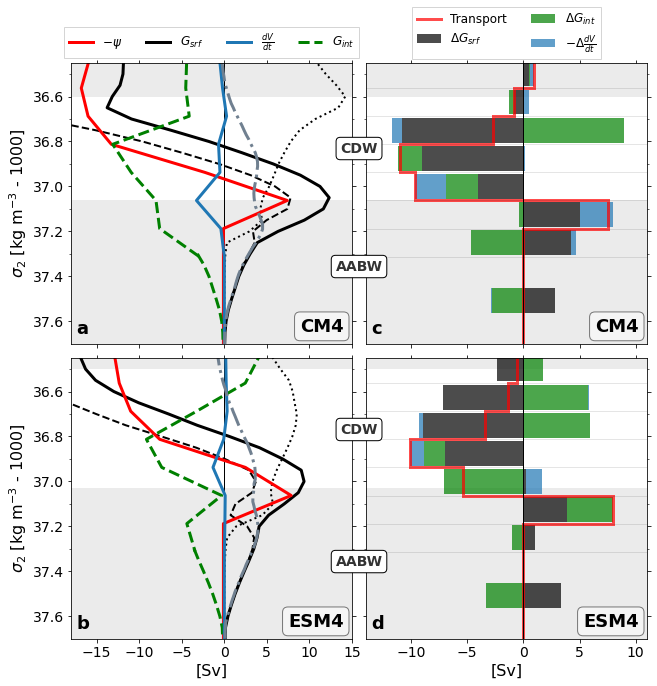

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace = 0.05, wspace = 0.05)

for i, mod in enumerate(ddict):
 
    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1033,1038),yq=slice(None,0))
    dVdt = ddict[mod]['dVdt'].sel(rho2_i=slice(1033,1038))
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0281','0380')).mean('time')*1e-6
        G_shlf = ddict_shlf[mod]['control'].onshlf.sel(time=slice('0281','0380')).mean('time')*1e-6
        G_dcmp = ddict_dcmp[mod].sel(time=slice('0281','0380')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0121','0220')).mean('time')*1e-6
        G_shlf = ddict_shlf[mod]['control'].onshlf.sel(time=slice('0121','0220')).mean('time')*1e-6
        G_dcmp = ddict_dcmp[mod].sel(time=slice('0121','0220')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0121','0220')).mean('time')
        
    M['sigma2'] = M.rho2_i-1000
    M = M.swap_dims({'rho2_i':'sigma2'})

    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    #smoc_mean = smoc_mean.swap_dims({'rho2_l':'sigma2'})
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    
    psi = (-smoc_mean).sel(yq=[-30], method='nearest').squeeze()
    #G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':'extrapolate'})
    G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':0})
    psi_interp = psi.interp(sigma2=G.sigma2,kwargs={'fill_value':0})
    M_interp = M.interp(sigma2=G.sigma2,kwargs={'fill_value':0})
    
    Gint_interp = M_interp+psi_interp-G
    Gint = M+psi-G_interp
    
    ################### Flux ###################
    # Export/Import at 30S
    dpsi = -1.*psi.diff('sigma2',label='lower')
    dpsi['sigma2'] = rho2_l-1000
    
    # Surface Formation/Destruction
    dG = -1.*G_interp.diff('sigma2',label='lower')
    dG['sigma2'] = rho2_l-1000
    
    # Deflation/Inflation
    dM = -1.*M.diff('sigma2',label='lower')
    dM['sigma2'] = rho2_l-1000
    
    # Interior Fromation/Destruction
    dD = -1.*Gint.diff('sigma2',label='lower')
    dD['sigma2'] = rho2_l-1000
    
    ds = dpsi.reset_coords(drop=True).to_dataset(name='psi')
    ds['wmt'] = dG.reset_coords(drop=True)
    ds['lvc'] = -1.*dM.reset_coords(drop=True)
    ds['mix'] = dD.reset_coords(drop=True)
    df = ds.to_dataframe()
    df.rename(index={df.index[-1]:37.3125+(37.7-37.3125)/2}, inplace=True)
    
    ################### Plot WMT ###################
     
    axs[i,0].axvline(x=0, ymin=0, ymax=1, linewidth=1.0, color = 'k')
    axs[i,0].plot(G_dcmp.heat,G_dcmp.sigma2, color='k', linestyle=':',lw=2)
    axs[i,0].plot(G_dcmp.salt,G_dcmp.sigma2, color='k', linestyle='--',lw=2)
    l1,=axs[i,0].plot(G,G.sigma2, color='k', linestyle='-',lw=3, label = '$G_{srf}$')
    l2,=axs[i,0].plot(psi,psi.sigma2, color='r', linestyle='-',lw=3, label = '$-\psi$')
    #axs[i,0].plot(psi_interp,psi_interp.sigma2, color='darkred', linestyle='-',lw=2,marker='o',ms=5)
    axs[i,0].plot(Gint.sel(sigma2=slice(None,37.4)), Gint.sigma2.sel(sigma2=slice(None,37.4)), 
                color='g', linestyle='--', lw=3, label = '$G_{int}$')
    l3,=axs[i,0].plot(Gint_interp.sel(sigma2=slice(37.25,None)), Gint_interp.sigma2.sel(sigma2=slice(37.25,None)), 
                color='g', linestyle='--', lw=3, label = '$G_{int}$')
    #l4,=axs[i,0].plot(M_interp, M_interp.sigma2, lw=2, label = '$\\frac{dV}{dt}$')
    l4,=axs[i,0].plot(M, M.sigma2, lw=3, label = '$\\frac{dV}{dt}$')
    
    
    axs[i,0].plot(G_shlf,G_shlf.sigma2, color='slategrey', linestyle='-.',lw=3)
    axs[i,0].set_xlim([-18,15])
    axs[i,0].set_xticks(np.arange(-15,20,5))
    
    ################### Plot WMF ###################
    
    axs[i,1].axvline(x=0, ymin=0, ymax=1, linewidth=1.0, color = 'k')
    for val in rho2_i:
        axs[i,1].axhline(y=val-1000, c='k', lw=1, alpha=0.1)
        
    for term in [df[df>0].fillna(0),df[df<0].fillna(0)]:
        p1 = axs[i,1].barh(term.index, term.wmt, bar_width, align='center', alpha=0.7, color='k', left=0)
        p2 = axs[i,1].barh(term.index, term.mix, bar_width, align='center', alpha=0.7, color='g', left=term.wmt)
        p3 = axs[i,1].barh(term.index, term.lvc, bar_width, align='center', alpha=0.7, color='tab:blue',
                          left=term.wmt+term.mix)
    p4 = axs[i,1].stairs(df.psi.values, edges=rho2_i-1000, color='r', lw=3, ls='-',alpha=0.7,
                         orientation='horizontal',label='Transport')#,label='Export (+) / Import (-)')
    
    #p1.set_label('Srf. formation (+) / destuction (-)')
    p1.set_label('$\Delta G_{srf}$')
    p2.set_label('$\Delta G_{int}$')
    p3.set_label('$-\Delta\\frac{dV}{dt}$')
    
    axs[i,1].set_xlim([-14, 11])
    axs[i,1].set_xticks(np.arange(-10,15,5))
    
    for j in [0,1]:
        
        axs[i,j].set_ylim([36.45,37.7])
        axs[i,j].set_yticks(np.arange(36.5,37.5,0.1), minor=True)
        axs[i,j].text(0.02, 0.02, lttr[i][j], ha='left', va='bottom', fontsize=18, fontweight='bold', 
                      transform=axs[i,j].transAxes)
        axs[i,j].text(0.97, 0.03, mod, ha='right', va='bottom', fontsize=18, fontweight='bold', 
                      transform=axs[i,j].transAxes, bbox = dict(boxstyle='round', facecolor='w', alpha=0.5))
    
        xlimit = axs[i,j].get_xlim()
        ylimit = axs[i,j].get_ylim()
        
        widx=2
        xy = (xlimit[0],ylimit[0])
        rwidth = ddict[mod]['sig2'][widx]-ylimit[0]
        rect = axs[i,j].add_patch(plt.Rectangle(xy, abs(xlimit[1]-xlimit[0]), rwidth,facecolor='silver',
                                                clip_on=False,linewidth = 0,alpha=0.3,zorder=0))
        
        widx=4
        xy = xlimit[0], ddict[mod]['sig2'][widx-1]
        rwidth = ylimit[1]-ddict[mod]['sig2'][widx-1]
        rect = axs[i,j].add_patch(plt.Rectangle(xy, abs(xlimit[1]-xlimit[0]), rwidth,facecolor='silver',
                                                clip_on=False,linewidth = 0,alpha=0.3,zorder=0))
        
        axs[i,j].tick_params(axis='both', which='both', labelsize=14, top=True, right=True)
        axs[i,j].invert_yaxis()
        
        if j == 0:
            axs[i,j].set_ylabel(r'$\sigma_2$ [kg m$^{-3}$ - 1000]',fontsize=16)
        else:
            #axs[i,j].xaxis.label.set_visible(False)
            axs[i,j].set_yticklabels([])
        
        if i == 1:
            axs[i,j].set_xlabel(r'[Sv]',fontsize=16)
        else:
            axs[i,j].set_xticklabels([])
            
    axs[i,0].text(1.025, 0.67 if mod =='CM4' else 0.72, 'CDW', fontsize=14, fontweight='bold',
                ha='center', va='bottom',color='k',alpha=0.8,#rotation=270,
                bbox=dict(boxstyle="round",ec='k',fc='w'), transform=axs[i,0].transAxes)
    fig.texts.append(axs[i,0].texts.pop())
    axs[i,0].text(1.025, 0.25, 'AABW', fontsize=14, fontweight='bold',
                ha='center', va='bottom',color='k',alpha=0.8,#rotation=270,
                bbox=dict(boxstyle="round",ec='k',fc='w'), transform=axs[i,0].transAxes)
    fig.texts.append(axs[i,0].texts.pop())
    
leg1 = axs[0,0].legend(handles=[l2,l1,l4,l3], frameon=True, fancybox=False, bbox_to_anchor=(0.5, 1.15), 
                     loc='upper center', ncol=4, fontsize=12)
leg2 = axs[0,1].legend(frameon=True, fancybox=False, bbox_to_anchor=(0.5, 1.22), 
                       loc='upper center', ncol=2, fontsize=12)

plt.savefig('volbal_ctrl.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format='png',transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

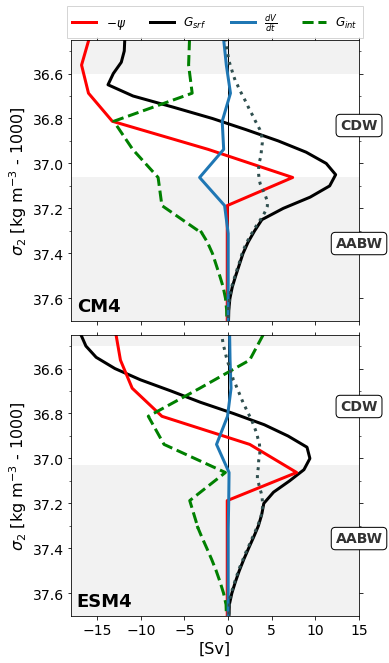

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(5,10))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9,hspace = 0.05)

for i, mod in enumerate(ddict):
 
    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1033,1038),yq=slice(None,0))
    dVdt = ddict[mod]['dVdt'].sel(rho2_i=slice(1033,1038))
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0281','0380')).mean('time')*1e-6
        G_shlf = ddict_shlf[mod]['control'].onshlf.sel(time=slice('0281','0380')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0121','0220')).mean('time')*1e-6
        G_shlf = ddict_shlf[mod]['control'].onshlf.sel(time=slice('0121','0220')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0121','0220')).mean('time')
        
    M['sigma2'] = M.rho2_i-1000
    M = M.swap_dims({'rho2_i':'sigma2'})

    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    #smoc_mean = smoc_mean.swap_dims({'rho2_l':'sigma2'})
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    
    psi = (-smoc_mean).sel(yq=[-30], method='nearest').squeeze()
    #G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':'extrapolate'})
    G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':0})
    psi_interp = psi.interp(sigma2=G.sigma2,kwargs={'fill_value':0})
    M_interp = M.interp(sigma2=G.sigma2,kwargs={'fill_value':0})
    
    Gint_interp = M_interp+psi_interp-G
    Gint = M+psi-G_interp
    
    
    axs[i].axvline(x=0, ymin=0, ymax=1, linewidth=1.0, color = 'k')
    l1,=axs[i].plot(G,G.sigma2, color='k', linestyle='-',lw=3, label = '$G_{srf}$')
    l2,=axs[i].plot(psi,psi.sigma2, color='r', linestyle='-',lw=3, label = '$-\psi$')
    #axs[i].plot(psi_interp,psi_interp.sigma2, color='darkred', linestyle='-',lw=2,marker='o',ms=5)
    axs[i].plot(Gint.sel(sigma2=slice(None,37.4)), Gint.sigma2.sel(sigma2=slice(None,37.4)), 
                color='g', linestyle='--', lw=3, label = '$G_{int}$')
    l3,=axs[i].plot(Gint_interp.sel(sigma2=slice(37.25,None)), Gint_interp.sigma2.sel(sigma2=slice(37.25,None)), 
                color='g', linestyle='--', lw=3, label = '$G_{int}$')
    #l4,=axs[i].plot(M_interp, M_interp.sigma2, lw=2, label = '$\\frac{dV}{dt}$')
    l4,=axs[i].plot(M, M.sigma2, lw=3, label = '$\\frac{dV}{dt}$')
    
    axs[i].plot(G_shlf,G_shlf.sigma2, color='darkslategrey', linestyle=':',lw=3)
    axs[i].set_ylim([36.45,37.7])
    axs[i].set_yticks(np.arange(36.5,37.5,0.1), minor=True)
    axs[i].set_xlim([-18,15])
    axs[i].set_xticks(np.arange(-15,20,5))
    axs[i].text(0.02, 0.02, mod, ha='left', va='bottom', fontsize=18, fontweight='bold', transform=axs[i].transAxes)
    
    xlimit = axs[i].get_xlim()
    ylimit = axs[i].get_ylim()
    
    widx=2
    xy = (xlimit[0],ylimit[0])
    rwidth = ddict[mod]['sig2'][widx]-ylimit[0]
    rect = axs[i].add_patch(plt.Rectangle(xy, abs(xlimit[1]-xlimit[0]), rwidth,facecolor='silver',
                                          clip_on=False,linewidth = 0,alpha=0.2)) 
        
    widx=4
    xy = xlimit[0], ddict[mod]['sig2'][widx-1]
    rwidth = ylimit[1]-ddict[mod]['sig2'][widx-1]
    rect = axs[i].add_patch(plt.Rectangle(xy, abs(xlimit[1]-xlimit[0]), rwidth,facecolor='silver',
                                          clip_on=False,linewidth = 0,alpha=0.2))
    
    axs[i].text(1, 0.67 if mod =='CM4' else 0.72, 'CDW', fontsize=14, fontweight='bold',
                ha='center', va='bottom',color='k',alpha=0.8,#rotation=270,
                bbox=dict(boxstyle="round",ec='k',fc='w'), transform=axs[i].transAxes)
    axs[i].text(1, 0.25, 'AABW', fontsize=14, fontweight='bold',
                ha='center', va='bottom',color='k',alpha=0.8,#rotation=270,
                bbox=dict(boxstyle="round",ec='k',fc='w'), transform=axs[i].transAxes)        

    axs[i].tick_params(axis='both', which='both', labelsize=14,top=True,right=True)
        
    
    axs[i].invert_yaxis()
    axs[i].set_ylabel(r'$\sigma_2$ [kg m$^{-3}$ - 1000]',fontsize=16)
        
axs[0].set_xticklabels([])
axs[1].set_xlabel(r'[Sv]',fontsize=16)
leg1 = axs[0].legend(handles=[l2,l1,l4,l3], frameon=True, fancybox=False, bbox_to_anchor=(0.5, 1.14), 
                     loc='upper center', ncol=4, fontsize=12)

plt.show()

0 Upper Ocean
1 SAMW
2 AAIW
3 CDW
4 AABW
0 Upper Ocean
1 SAMW
2 AAIW
3 CDW
4 AABW


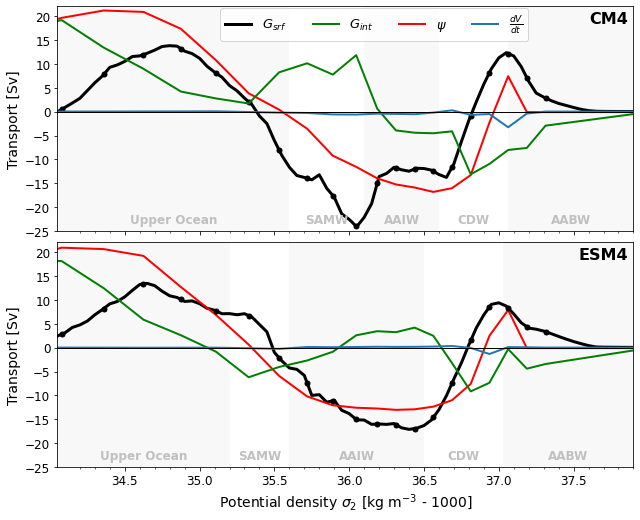

In [102]:
fig, axs = plt.subplots(2, 1, sharex=False, figsize=(10,8))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9,hspace = 0.05)

for i, mod in enumerate(ddict):
 
    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1033,1038),yq=slice(None,0))
    dVdt = ddict[mod]['dVdt'].sel(rho2_i=slice(1033,1038))
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0281','0380')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0121','0220')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0121','0220')).mean('time')
        
    M['sigma2'] = M.rho2_i-1000
    M = M.swap_dims({'rho2_i':'sigma2'})

    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    #smoc_mean = smoc_mean.swap_dims({'rho2_l':'sigma2'})
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    
    psi = (-smoc_mean).sel(yq=[-30], method='nearest').squeeze()
    #G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':'extrapolate'})
    G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':0})
        
    l1,=axs[i].plot(G.sigma2, G, color='k', linestyle='-',lw=3, label = '$G_{srf}$')
    l2,=axs[i].plot(psi.sigma2, psi, color='r', linestyle='-',lw=2, label = '$\psi$')
    axs[i].plot(G_interp.sigma2, G_interp, marker='o',ms=5, c='k', ls='none')
    l3,=(M+psi-G_interp).plot(ax=axs[i], color='g', linestyle='-', lw=2, label = '$G_{int}$',_labels=None)
    l4,=axs[i].plot(M.sigma2, M, lw=2, label = '$\\frac{dV}{dt}$')
    axs[i].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
    axs[i].set_xlim([34.05,37.8])
    axs[i].set_xticks(np.arange(34.2,38,0.1), minor=True)
    axs[i].set_ylim([-25,22])
    axs[i].set_yticks(np.arange(-25,25,5))
    axs[i].text(0.99, 0.98, mod, ha='right', va='top', fontsize=16, fontweight='bold',
                transform=axs[i].transAxes)
    axs[i].set_ylabel(r'Transport [Sv]',fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    
    xlimit = axs[i].get_xlim()
    ylimit = axs[i].get_ylim()
    for widx, wm in enumerate(ddict[mod]['water_mass']):
        print(widx, wm)
        
        xy = (xlimit[0],ylimit[0]) if widx==0 else (ddict[mod]['sig2'][widx-1],ylimit[0])
        rwidth = ddict[mod]['sig2'][widx]-xlimit[0] if widx==0 \
                    else ddict[mod]['sig2'][widx]-ddict[mod]['sig2'][widx-1] \
                    if (widx>0) & (widx<len(ddict[mod]['water_mass'])-1) \
                    else xlimit[1]-ddict[mod]['sig2'][widx-1]
        
        rect = axs[i].add_patch(plt.Rectangle(xy,rwidth, abs(ylimit[1]-ylimit[0]),facecolor='silver',
                                              clip_on=False,linewidth = 0,alpha=0.1 if widx%2==0 else 0.0))
        axs[i].text(xy[0]+rwidth/2, xy[1]+1, ddict[mod]['water_mass'][widx], fontsize=12, fontweight='bold',
                    ha='center', va='bottom',color='silver')

leg1 = axs[0].legend(handles=[l1,l3,l2,l4], frameon=True, fancybox=True, bbox_to_anchor=(0.55, 1.02), 
                     loc='upper center', ncol=4, fontsize=13)
axs[1].set_xlabel(r'Potential density $\sigma_2$ [kg m$^{-3}$ - 1000]',fontsize=14)
axs[0].set_xticklabels([])

plt.show()

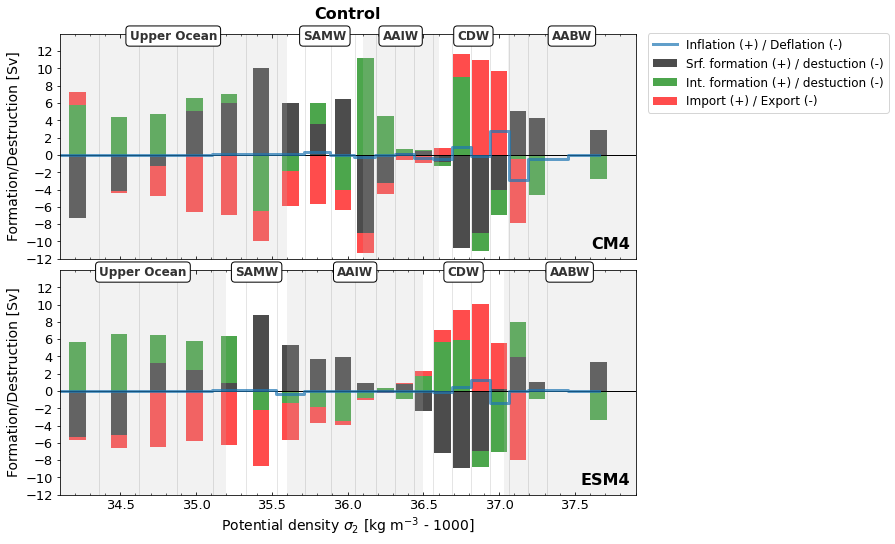

In [27]:
bar_width = 0.11
add_wm=True

fig, axs = plt.subplots(2, 1, sharex=False, figsize=(10,8))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9,hspace = 0.05)

for i, mod in enumerate(ddict):
 
    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1020,None),yq=slice(None,0))
    dVdt = ddict[mod]['dVdt'].sel(rho2_i=slice(1020,None))
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0281','0380')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0121','0220')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0121','0220')).mean('time')
        
    M['sigma2'] = M.rho2_i-1000
    M = M.swap_dims({'rho2_i':'sigma2'})

    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    #smoc_mean = smoc_mean.swap_dims({'rho2_l':'sigma2'})
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    
    psi = (-smoc_mean).sel(yq=[-30], method='nearest').squeeze()
    #G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':'extrapolate'})
    G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':0})
    
    dpsi = -1.*psi.diff('sigma2',label='lower')
    dpsi['sigma2'] = rho2_l-1000
    
    dG = -1.*G_interp.diff('sigma2',label='lower')
    dG['sigma2'] = rho2_l-1000
    
    dM = -1.*M.diff('sigma2',label='lower')
    dM['sigma2'] = rho2_l-1000
    
    D = M + psi - G_interp
    dD = -1.*D.diff('sigma2',label='lower')
    dD['sigma2'] = rho2_l-1000
    
    #dpsi = -1.*(M+psi).diff('sigma2',label='lower')
    #dpsi['sigma2'] = rho2_l-1000
    
    ds = -1.*dpsi.reset_coords(drop=True).to_dataset(name='psi')
    ds['wmt'] = dG.reset_coords(drop=True)
    ds['lvc'] = dM.reset_coords(drop=True)
    ds['mix'] = dD.reset_coords(drop=True)
    df = ds.to_dataframe()
    
    axs[i].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
    for val in rho2_i:
        axs[i].axvline(x=val-1000,c='k',lw=1,alpha=0.1)
        
    for term in [df[df>0].fillna(0),df[df<0].fillna(0)]:
        p1 = axs[i].bar(term.index, term.wmt, bar_width, align='center', alpha=0.7, color='k', bottom=0)
        p2 = axs[i].bar(term.index, term.mix, bar_width, align='center', alpha=0.7, color='g', bottom=term.wmt)
        p3 = axs[i].bar(term.index, term.psi, bar_width, align='center', alpha=0.7, color='r',
                        bottom=term.wmt+term.mix)
        
    p4 = axs[i].step(df.index, df.lvc, where='mid', c='tab:blue', lw=3, ls='-',alpha=0.7,
                     label='Inflation (+) / Deflation (-)')
    #p4 = axs[i].step(df.index, df.psi, where='mid', c='m', lw=3, ls='-',alpha=0.7,label='Total')
    
    p1.set_label('Srf. formation (+) / destuction (-)')
    p2.set_label('Int. formation (+) / destuction (-)')
    p3.set_label('Import (+) / Export (-)')
    
    axs[i].set_ylim([-12, 14])
    axs[i].set_yticks(np.arange(-12,14,2))
    axs[i].set_xlim([34.1,37.9])
    axs[i].set_xticks(np.arange(34.2,38,0.1), minor=True)
    axs[i].tick_params(axis='both', which='major', labelsize=13)
    axs[i].set_ylabel('Formation/Destruction [Sv]',fontsize=14)
    axs[i].xaxis.set_tick_params(top=True,direction='in')
    axs[i].tick_params(axis='x', which='minor', top=True,direction='in')
    
    if add_wm:
        xlimit = axs[i].get_xlim()
        ylimit = axs[i].get_ylim()
        for widx, wm in enumerate(ddict[mod]['water_mass']):
            xy = (xlimit[0],ylimit[0]) if widx==0 else (ddict[mod]['sig2'][widx-1],ylimit[0])
            rwidth = ddict[mod]['sig2'][widx]-xlimit[0] if widx==0 \
                        else ddict[mod]['sig2'][widx]-ddict[mod]['sig2'][widx-1] \
                        if (widx>0) & (widx<len(ddict[mod]['water_mass'])-1) \
                        else xlimit[1]-ddict[mod]['sig2'][widx-1]
            rect = axs[i].add_patch(plt.Rectangle(xy,rwidth, abs(ylimit[1]-ylimit[0]),facecolor='silver',
                                                  clip_on=False,linewidth = 0,alpha=0.2 if widx%2==0 else 0.0))
            axs[i].text(xy[0]+rwidth/2, ylimit[1]-1, ddict[mod]['water_mass'][widx], fontsize=12, fontweight='bold',
                        ha='center', va='bottom',color='k',alpha=0.8,
                        bbox=dict(boxstyle="round",ec='k',fc='w'))
            
    axs[i].text(0.99, 0.03, mod, ha='right', va='bottom', fontsize=16, fontweight='bold',
                transform=axs[i].transAxes)

leg1 = axs[0].legend(fontsize=12, loc='upper right', frameon=True, fancybox=True,  ncol=1,
                     bbox_to_anchor=(1.45, 1.03))

axs[1].set_xlabel(r'Potential density $\sigma_2$ [kg m$^{-3}$ - 1000]',fontsize=14)
axs[0].set_xticklabels([])
axs[0].set_title('Control',fontsize=16, y=1.0, pad=15,fontweight='bold')

plt.show()

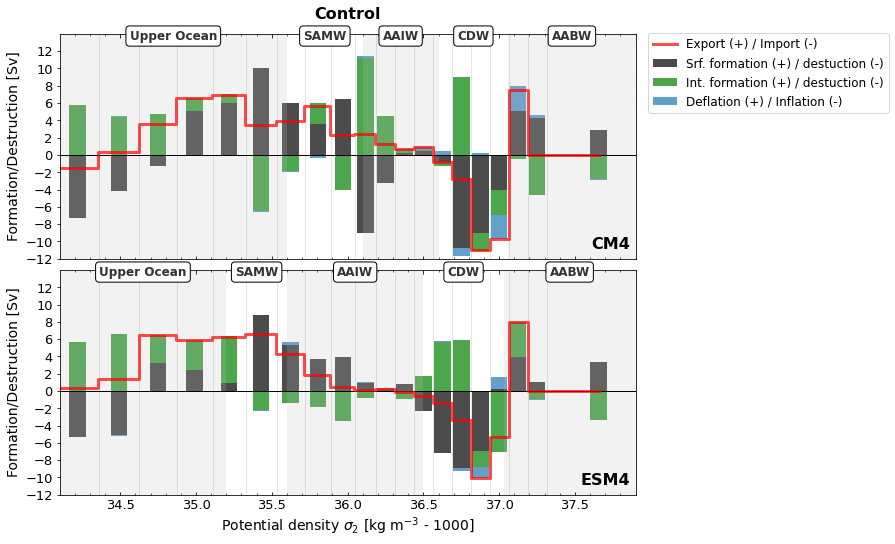

In [28]:
bar_width = 0.11
add_wm=True

fig, axs = plt.subplots(2, 1, sharex=False, figsize=(10,8))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9,hspace = 0.05)

for i, mod in enumerate(ddict):
 

    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1020,None),yq=slice(None,0))
    dVdt = ddict[mod]['dVdt'].sel(rho2_i=slice(1020,None))
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0281','0380')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0121','0220')).mean('time')*1e-6
        M = dVdt.sel(time=slice('0121','0220')).mean('time')
        
    M['sigma2'] = M.rho2_i-1000
    M = M.swap_dims({'rho2_i':'sigma2'})

    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    #smoc_mean = smoc_mean.swap_dims({'rho2_l':'sigma2'})
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    
    psi = (-smoc_mean).sel(yq=[-30], method='nearest').squeeze()
    #G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':'extrapolate'})
    G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':0})
    
    dpsi = -1.*psi.diff('sigma2',label='lower')
    dpsi['sigma2'] = rho2_l-1000
    
    dG = -1.*G_interp.diff('sigma2',label='lower')
    dG['sigma2'] = rho2_l-1000
    
    dM = -1.*M.diff('sigma2',label='lower')
    dM['sigma2'] = rho2_l-1000
    
    D = M + psi - G_interp
    dD = -1.*D.diff('sigma2',label='lower')
    dD['sigma2'] = rho2_l-1000
    
    #dpsi = -1.*(M+psi).diff('sigma2',label='lower')
    #dpsi['sigma2'] = rho2_l-1000
    
    ds = dpsi.reset_coords(drop=True).to_dataset(name='psi')
    ds['wmt'] = dG.reset_coords(drop=True)
    ds['lvc'] = -1.*dM.reset_coords(drop=True)
    ds['mix'] = dD.reset_coords(drop=True)
    df = ds.to_dataframe()
    
    axs[i].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
    for val in rho2_i:
        axs[i].axvline(x=val-1000,c='k',lw=1,alpha=0.1)
        
    for term in [df[df>0].fillna(0),df[df<0].fillna(0)]:
        p1 = axs[i].bar(term.index, term.wmt, bar_width, align='center', alpha=0.7, color='k', bottom=0)
        p2 = axs[i].bar(term.index, term.mix, bar_width, align='center', alpha=0.7, color='g', bottom=term.wmt)
        p3 = axs[i].bar(term.index, term.lvc, bar_width, align='center', alpha=0.7, color='tab:blue',
                        bottom=term.wmt+term.mix)
        
    p4 = axs[i].step(df.index, df.psi, where='mid', c='r', lw=3, ls='-',alpha=0.7,
                     label='Export (+) / Import (-)')
    
    p1.set_label('Srf. formation (+) / destuction (-)')
    p2.set_label('Int. formation (+) / destuction (-)')
    p3.set_label('Deflation (+) / Inflation (-)')
    
    axs[i].set_ylim([-12, 14])
    axs[i].set_yticks(np.arange(-12,14,2))
    axs[i].set_xlim([34.1,37.9])
    axs[i].set_xticks(np.arange(34.2,38,0.1), minor=True)
    axs[i].tick_params(axis='both', which='major', labelsize=13)
    axs[i].set_ylabel('Formation/Destruction [Sv]',fontsize=14)
    axs[i].xaxis.set_tick_params(top=True,direction='in')
    axs[i].tick_params(axis='x', which='minor', top=True,direction='in')
    
    if add_wm:
        xlimit = axs[i].get_xlim()
        ylimit = axs[i].get_ylim()
        for widx, wm in enumerate(ddict[mod]['water_mass']):
            xy = (xlimit[0],ylimit[0]) if widx==0 else (ddict[mod]['sig2'][widx-1],ylimit[0])
            rwidth = ddict[mod]['sig2'][widx]-xlimit[0] if widx==0 \
                        else ddict[mod]['sig2'][widx]-ddict[mod]['sig2'][widx-1] \
                        if (widx>0) & (widx<len(ddict[mod]['water_mass'])-1) \
                        else xlimit[1]-ddict[mod]['sig2'][widx-1]
            rect = axs[i].add_patch(plt.Rectangle(xy,rwidth, abs(ylimit[1]-ylimit[0]),facecolor='silver',
                                                  clip_on=False,linewidth = 0,alpha=0.2 if widx%2==0 else 0.0))
            axs[i].text(xy[0]+rwidth/2, ylimit[1]-1, ddict[mod]['water_mass'][widx], fontsize=12, fontweight='bold',
                        ha='center', va='bottom',color='k',alpha=0.8,
                        bbox=dict(boxstyle="round",ec='k',fc='w'))
            
    axs[i].text(0.99, 0.03, mod, ha='right', va='bottom', fontsize=16, fontweight='bold',
                transform=axs[i].transAxes)

leg1 = axs[0].legend(fontsize=12, loc='upper right', frameon=True, fancybox=True,  ncol=1,
                     bbox_to_anchor=(1.45, 1.03))

axs[1].set_xlabel(r'Potential density $\sigma_2$ [kg m$^{-3}$ - 1000]',fontsize=14)
axs[0].set_xticklabels([])
axs[0].set_title('Control',fontsize=16, y=1.0, pad=15,fontweight='bold')

plt.show()

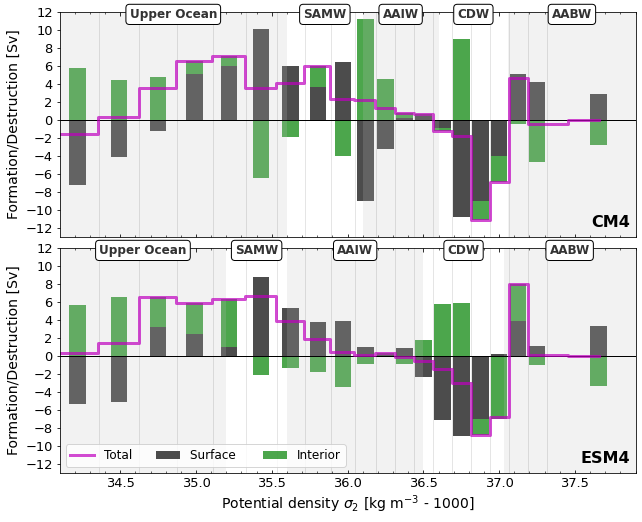

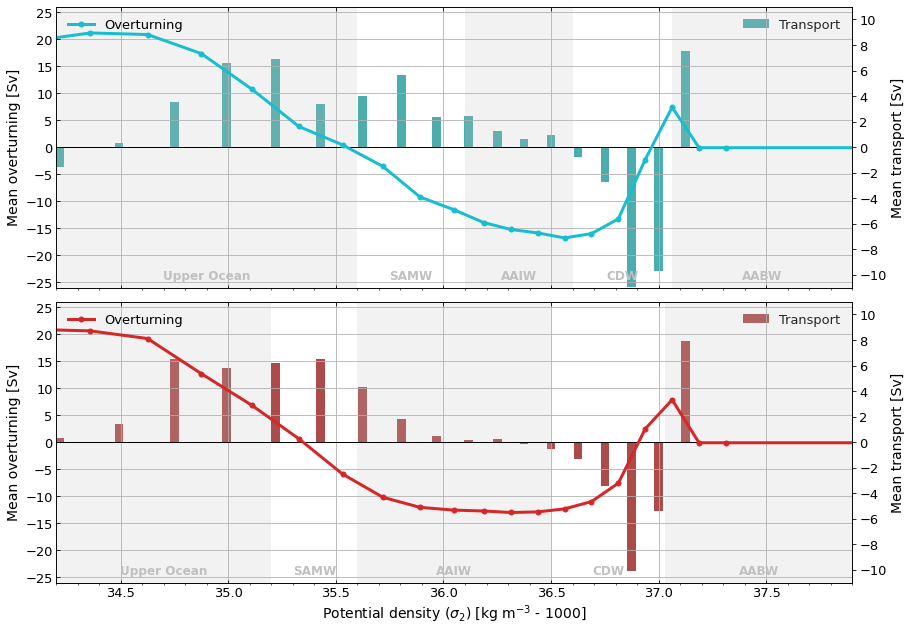

In [14]:
cstr = ['tab:cyan','tab:red']
bcstr = ['darkcyan','darkred']    

fig, axs = plt.subplots(2, 1, figsize=(14,10))
fig.subplots_adjust(left=0.1, right=0.89, bottom=0.1, top=0.9, hspace=0.05, wspace=0.05)

for i, mod in enumerate(ddict):
    
    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1033,1038),yq=slice(None,0))
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
    
    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    psi = (-smoc_mean).sel(yq=[-30], method='nearest').squeeze()
    dpsi = -1.*psi.diff('sigma2',label='lower')
    dpsi['sigma2'] = rho2_l-1000
    
    axs[i].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
    axs[i].plot(psi[lstr], psi, color=cstr[i], linestyle='-',lw=3,marker='o',ms=5,label='Overturning')
    axs[i].grid(True)
    axs[i].set_xticks(np.arange(34.2,38,0.1), minor=True)
    axs[i].tick_params(axis='both', which='major', labelsize=13)
    axs[i].xaxis.set_tick_params(top=True,direction='in')
    axs[i].yaxis.set_tick_params(right=True,direction='in')
    
    axs[i].set_xlim([34.2,37.9])
    axs[i].set_ylim([-26,26])
    axs[i].set_yticks(np.arange(-25,30,5))
    axs[i].set_ylabel('Mean overturning [Sv]',fontsize=14)
    
    if mod=='ESM4':
        axs[i].set_xlabel('Potential density ($\sigma_2$) [kg m$^{-3}$ - 1000]',fontsize=14)
    else:
        axs[i].set_xticklabels([])
    axs[i].legend(frameon=False, fancybox=False, loc='upper left', fontsize=13)
    
    xlimit = axs[i].get_xlim()
    ylimit = axs[i].get_ylim()
    for widx, wm in enumerate(ddict[mod]['water_mass']):
        
        xy = (xlimit[0],ylimit[0]) if widx==0 else (ddict[mod]['sig2'][widx-1],ylimit[0])
        rwidth = ddict[mod]['sig2'][widx]-xlimit[0] if widx==0 \
                    else ddict[mod]['sig2'][widx]-ddict[mod]['sig2'][widx-1] \
                    if (widx>0) & (widx<len(ddict[mod]['water_mass'])-1) \
                    else xlimit[1]-ddict[mod]['sig2'][widx-1]
        
        rect = axs[i].add_patch(plt.Rectangle(xy,rwidth, abs(ylimit[1]-ylimit[0]),facecolor='silver',
                                              clip_on=False,linewidth = 0,alpha=0.2 if widx%2==0 else 0.0))
        axs[i].text(xy[0]+rwidth/2, xy[1]+1, ddict[mod]['water_mass'][widx], fontsize=12, fontweight='bold',
                    ha='center', va='bottom',color='silver')
        
    ax2 = axs[i].twinx()
    ax2.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
    ax2.bar(dpsi.sigma2, dpsi, color=bcstr[i],width=0.04,alpha=0.7,label='Transport')
    ax2.set_xticks(np.arange(34.2,38,0.1), minor=True)
    ax2.tick_params(axis='both', which='major', labelsize=13)
    ax2.set_xlim([34.2,37.9])
    ax2.set_ylim([-11,11])
    ax2.set_yticks(np.arange(-10,12,2))
    ax2.set_ylabel('Mean transport [Sv]',fontsize=14)
    ax2.legend(frameon=False, fancybox=False, loc='upper right', fontsize=13)
    axs[i].set_zorder(1)
    ax2.set_zorder(0)
    axs[i].patch.set_visible(False)
    
plt.show()

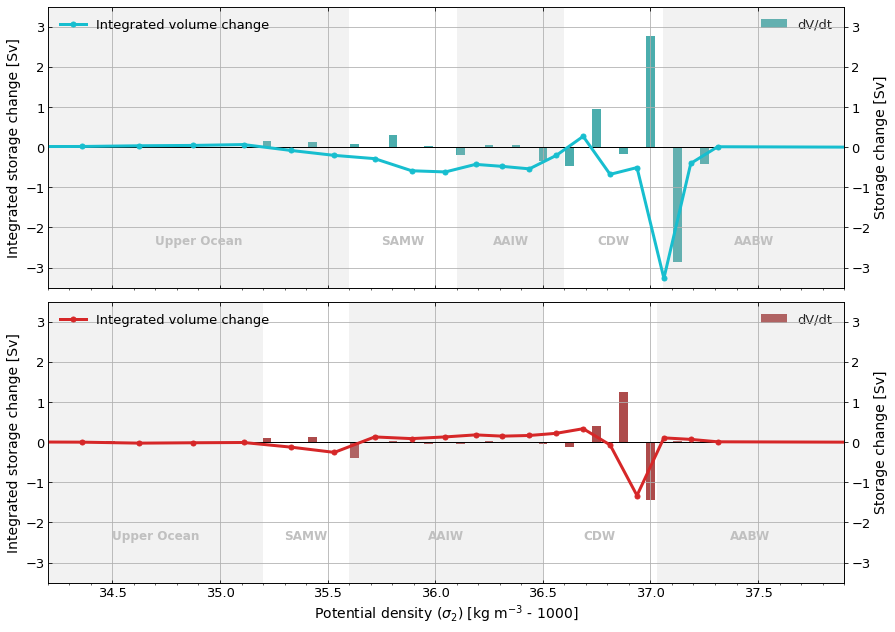

In [10]:
cstr = ['tab:cyan','tab:red']
bcstr = ['darkcyan','darkred']    

fig, axs = plt.subplots(2, 1, figsize=(14,10))
fig.subplots_adjust(left=0.1, right=0.89, bottom=0.1, top=0.9, hspace=0.05, wspace=0.05)

for i, mod in enumerate(ddict):
    
    dVdt = ddict[mod]['dVdt'].sel(rho2_i=slice(1033,1038))
    if mod=='CM4':
        M = dVdt.sel(time=slice('0281','0380')).mean('time')
    elif mod=='ESM4':
        M = dVdt.sel(time=slice('0121','0220')).mean('time')
    
    M['sigma2'] = M.rho2_i-1000
    M = M.swap_dims({'rho2_i':'sigma2'})
    
    dM = -1.*M.diff('sigma2',label='lower')
    dM['sigma2'] = rho2_l-1000
    
    axs[i].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
    axs[i].plot(M[lstr], M, color=cstr[i], linestyle='-',lw=3,marker='o',ms=5,label='Integrated volume change')
    axs[i].grid(True)
    axs[i].set_xticks(np.arange(34.2,38,0.1), minor=True)
    axs[i].tick_params(axis='both', which='major', labelsize=13)
    axs[i].xaxis.set_tick_params(top=True,direction='in')
    axs[i].yaxis.set_tick_params(right=True,direction='in')
    
    axs[i].set_xlim([34.2,37.9])
    axs[i].set_ylim([-3.5,3.5])
    axs[i].set_yticks(np.arange(-3,4,1))
    axs[i].set_ylabel('Integrated storage change [Sv]',fontsize=14)
    
    if mod=='ESM4':
        axs[i].set_xlabel('Potential density ($\sigma_2$) [kg m$^{-3}$ - 1000]',fontsize=14)
    else:
        axs[i].set_xticklabels([])
    axs[i].legend(frameon=False, fancybox=False, loc='upper left', fontsize=13)
    
    xlimit = axs[i].get_xlim()
    ylimit = axs[i].get_ylim()
    for widx, wm in enumerate(ddict[mod]['water_mass']):
        
        xy = (xlimit[0],ylimit[0]) if widx==0 else (ddict[mod]['sig2'][widx-1],ylimit[0])
        rwidth = ddict[mod]['sig2'][widx]-xlimit[0] if widx==0 \
                    else ddict[mod]['sig2'][widx]-ddict[mod]['sig2'][widx-1] \
                    if (widx>0) & (widx<len(ddict[mod]['water_mass'])-1) \
                    else xlimit[1]-ddict[mod]['sig2'][widx-1]
        
        rect = axs[i].add_patch(plt.Rectangle(xy,rwidth, abs(ylimit[1]-ylimit[0]),facecolor='silver',
                                              clip_on=False,linewidth = 0,alpha=0.2 if widx%2==0 else 0.0))
        axs[i].text(xy[0]+rwidth/2, xy[1]+1, ddict[mod]['water_mass'][widx], fontsize=12, fontweight='bold',
                    ha='center', va='bottom',color='silver')
        
    ax2 = axs[i].twinx()
    ax2.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')

    ax2.bar(dM.sigma2, dM, color=bcstr[i], width=0.04, alpha=0.7, label='dV/dt')
    ax2.set_xticks(np.arange(34.2,38,0.1), minor=True)
    ax2.tick_params(axis='both', which='major', labelsize=13)
    ax2.set_xlim([34.2,37.9])
    ax2.set_ylim([-3.5,3.5])
    ax2.set_yticks(np.arange(-3,4,1))
    ax2.set_ylabel('Storage change [Sv]',fontsize=14)
    ax2.legend(frameon=False, fancybox=False, loc='upper right', fontsize=13)
    axs[i].set_zorder(1)
    ax2.set_zorder(0)
    axs[i].patch.set_visible(False)
    
plt.show()

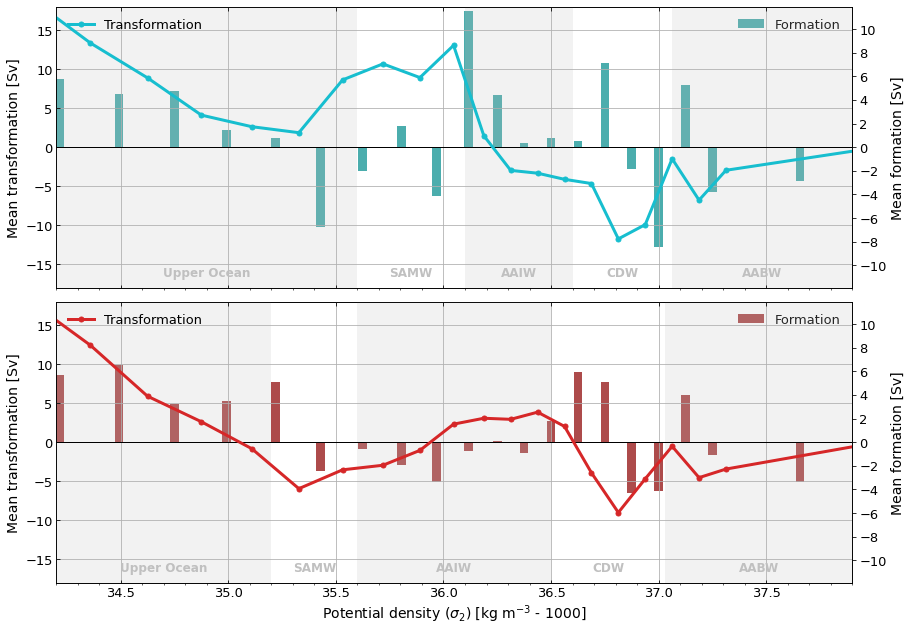

In [14]:
cstr = ['tab:cyan','tab:red']
bcstr = ['darkcyan','darkred']    

fig, axs = plt.subplots(2, 1, figsize=(14,10))
fig.subplots_adjust(left=0.1, right=0.89, bottom=0.1, top=0.9, hspace=0.05, wspace=0.05)

for i, mod in enumerate(ddict):
    
    smoc = ddict[mod]['psi'].sel(rho2_i=slice(1033,1038),yq=slice(None,0))
    dVdt = ddict[mod]['dVdt'].sel(rho2_i=slice(1033,1038))
    if mod=='CM4':
        smoc_mean = smoc.sel(time=slice('0281','0380')).mean('time')
        M = dVdt.sel(time=slice('0281','0380')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0281','0380')).mean('time')*1e-6
    elif mod=='ESM4':
        smoc_mean = smoc.sel(time=slice('0121','0220')).mean('time')
        M = dVdt.sel(time=slice('0121','0220')).mean('time')
        G = ddict[mod]['swmt'].sel(time=slice('0121','0220')).mean('time')*1e-6
    
    # Overturning
    smoc_mean['sigma2'] = smoc_mean.rho2_i-1000
    smoc_mean = smoc_mean.swap_dims({'rho2_i':'sigma2'})
    psi = (-smoc_mean).sel(yq=[-30], method='nearest').squeeze()
    dpsi = -1.*psi.diff('sigma2',label='lower')
    dpsi['sigma2'] = rho2_l-1000
    
    # Volume change
    M['sigma2'] = M.rho2_i-1000
    M = M.swap_dims({'rho2_i':'sigma2'})
    dM = -1.*M.diff('sigma2',label='lower')
    dM['sigma2'] = rho2_l-1000
    
    # Surface WMT
    G_interp = G.interp(sigma2=psi.sigma2,kwargs={'fill_value':0})
    dG = -1.*G_interp.diff('sigma2',label='lower')
    dG['sigma2'] = rho2_l-1000
    
    # Interior WMT
    D = psi - G_interp - M
    dD = -1.*D.diff('sigma2',label='lower')
    dD['sigma2'] = rho2_l-1000
    
    axs[i].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
    axs[i].plot(D[lstr], D, color=cstr[i], linestyle='-',lw=3, marker='o',ms=5,label='Transformation')
    axs[i].grid(True)
    axs[i].set_xticks(np.arange(34.2,38,0.1), minor=True)
    axs[i].tick_params(axis='both', which='major', labelsize=13)
    axs[i].xaxis.set_tick_params(top=True,direction='in')
    axs[i].yaxis.set_tick_params(right=True,direction='in')
    
    axs[i].set_xlim([34.2,37.9])
    axs[i].set_ylim([-18,18])
    axs[i].set_yticks(np.arange(-15,20,5))
    axs[i].set_ylabel('Mean transformation [Sv]',fontsize=14)
    
    if mod=='ESM4':
        axs[i].set_xlabel('Potential density ($\sigma_2$) [kg m$^{-3}$ - 1000]',fontsize=14)
    else:
        axs[i].set_xticklabels([])
    axs[i].legend(frameon=False, fancybox=False, loc='upper left', fontsize=13)
    
    xlimit = axs[i].get_xlim()
    ylimit = axs[i].get_ylim()
    for widx, wm in enumerate(ddict[mod]['water_mass']):
        
        xy = (xlimit[0],ylimit[0]) if widx==0 else (ddict[mod]['sig2'][widx-1],ylimit[0])
        rwidth = ddict[mod]['sig2'][widx]-xlimit[0] if widx==0 \
                    else ddict[mod]['sig2'][widx]-ddict[mod]['sig2'][widx-1] \
                    if (widx>0) & (widx<len(ddict[mod]['water_mass'])-1) \
                    else xlimit[1]-ddict[mod]['sig2'][widx-1]
        
        rect = axs[i].add_patch(plt.Rectangle(xy,rwidth, abs(ylimit[1]-ylimit[0]),facecolor='silver',
                                              clip_on=False,linewidth = 0,alpha=0.2 if widx%2==0 else 0.0))
        axs[i].text(xy[0]+rwidth/2, xy[1]+1, ddict[mod]['water_mass'][widx], fontsize=12, fontweight='bold',
                    ha='center', va='bottom',color='silver')
        
    ax2 = axs[i].twinx()
    ax2.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
    ax2.bar(dD.sigma2, dD, color=bcstr[i],width=0.04,alpha=0.7,label='Formation')
    ax2.set_xticks(np.arange(34.2,38,0.1), minor=True)
    ax2.tick_params(axis='both', which='major', labelsize=13)
    ax2.set_xlim([34.2,37.9])
    ax2.set_ylim([-11.9,11.9])
    ax2.set_yticks(np.arange(-10,12,2))
    ax2.set_ylabel('Mean formation [Sv]',fontsize=14)
    ax2.legend(frameon=False, fancybox=False, loc='upper right', fontsize=13)
    axs[i].set_zorder(1)
    ax2.set_zorder(0)
    axs[i].patch.set_visible(False)

plt.show()